In [1]:
%matplotlib inline
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = Table.read('/home/aalvarez/Work/Data/WillHartley/AllCross.fits', hdu=1)

In [8]:
zbins = Table.read('/home/aalvarez/Work/Data/WillHartley/RUN_corrected.fits', hdu=2)['BINS_PDF']

In [15]:
most_moved = np.flip(np.argsort(np.abs(t['REDSHIFT_MODE'] - t['not_REDSHIFT_MODE'])))

In [46]:
def plot_pdz(ax, i):
    obj = t[i]
    ax.plot(zbins, obj['unshifted_REDSHIFT_PDF'], label='Unshifted {:.2f}'.format(obj['unshifted_REDSHIFT_MODE']))
    ax.plot(zbins, obj['not_REDSHIFT_PDF'], ':', label='Not corrected {:.2f}'.format(obj['not_REDSHIFT_MODE']))
    ax.plot(zbins, obj['REDSHIFT_PDF'], '--', label='Corrected {:.2f}'.format(obj['REDSHIFT_MODE']))
    ax.set_title('Real: {:.2f}'.format(obj['z']))
    ax.set_xlabel('z')
    ax.legend()

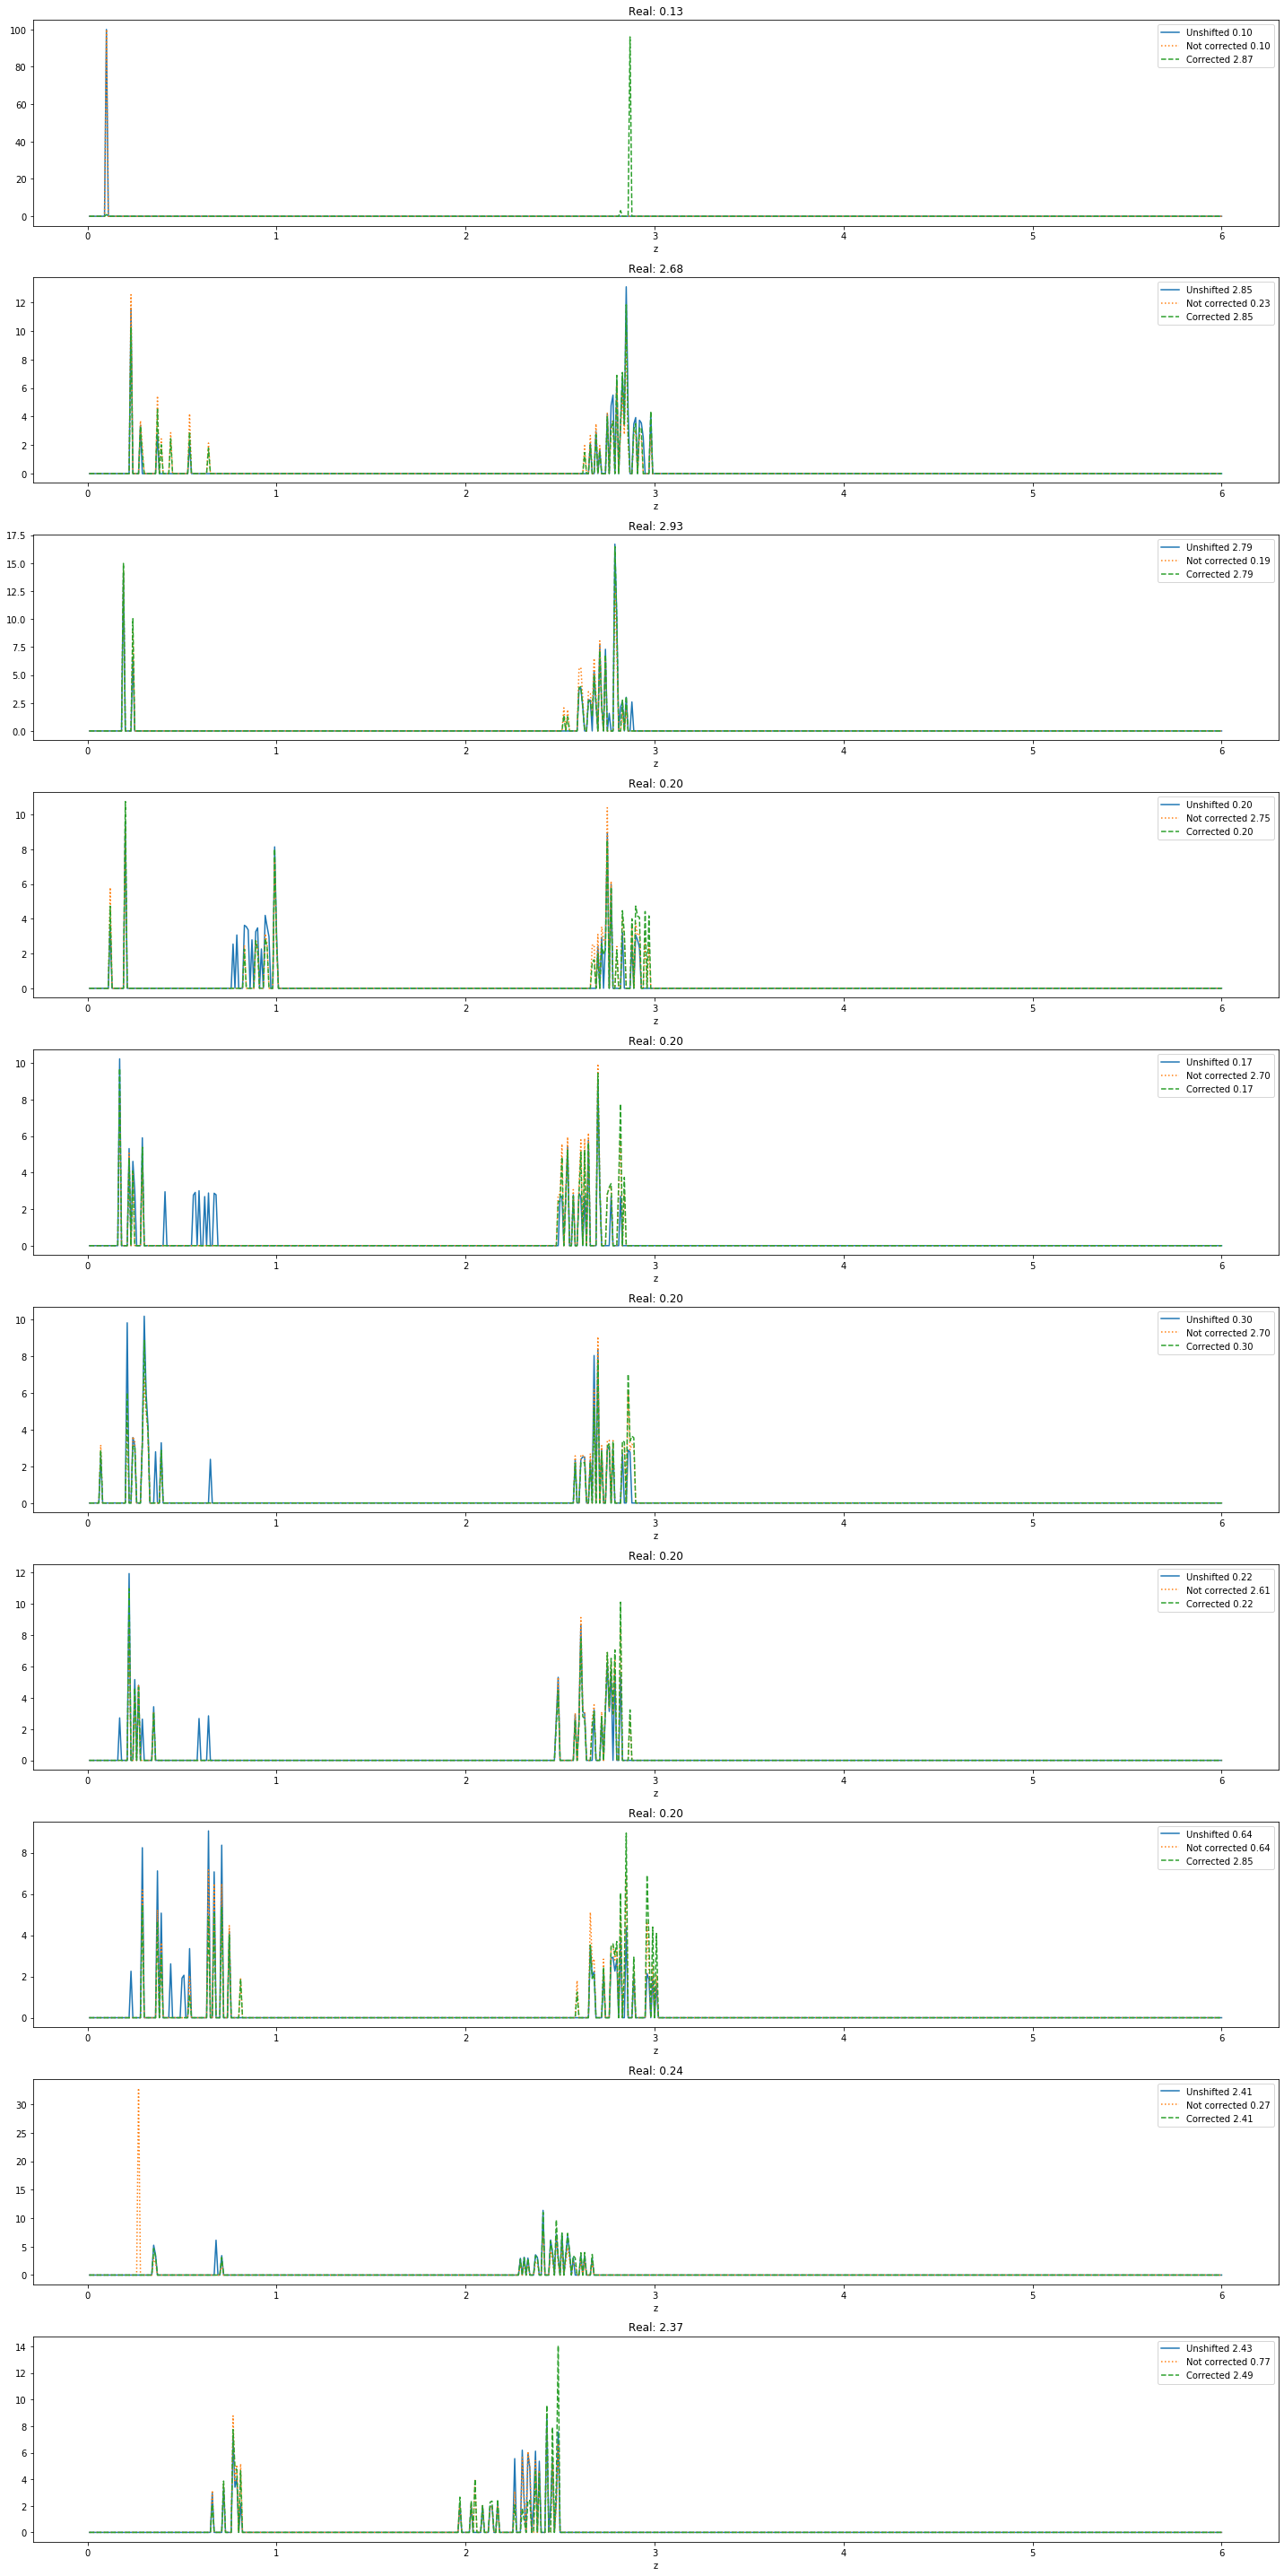

In [53]:
fig, axes = plt.subplots(nrows=10, figsize=(20,40))
for i, ax in enumerate(axes.ravel()):
    plot_pdz(ax, most_moved[i])
plt.tight_layout()

In [54]:
sys.path.append('/home/aalvarez/Work/Projects/Elements/5.8/InstallArea/x86_64-fc31-gcc92-dbg/python/')
sys.path.append('/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/NNPZ/python/')
os.environ['ELEMENTS_AUX_PATH'] = '/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/NNPZ/auxdir/'
os.environ['PATH'] = os.environ['PATH'] + ':/home/aalvarez/Work/Projects/PHZ_NNPZ/PHZ_NNPZ/build.x86_64-fc31-gcc92-dbg/scripts/'

In [55]:
from nnpz.reference_sample.ReferenceSample import ReferenceSample

In [56]:
ref = ReferenceSample('/home/aalvarez/Work/Data/WillHartley/ReferenceSample/')

In [57]:
z = []
for obj in ref.getIds():
    pdz = ref.getPdzData(obj)
    z.append(pdz[np.argmax(pdz[:,1]),0])

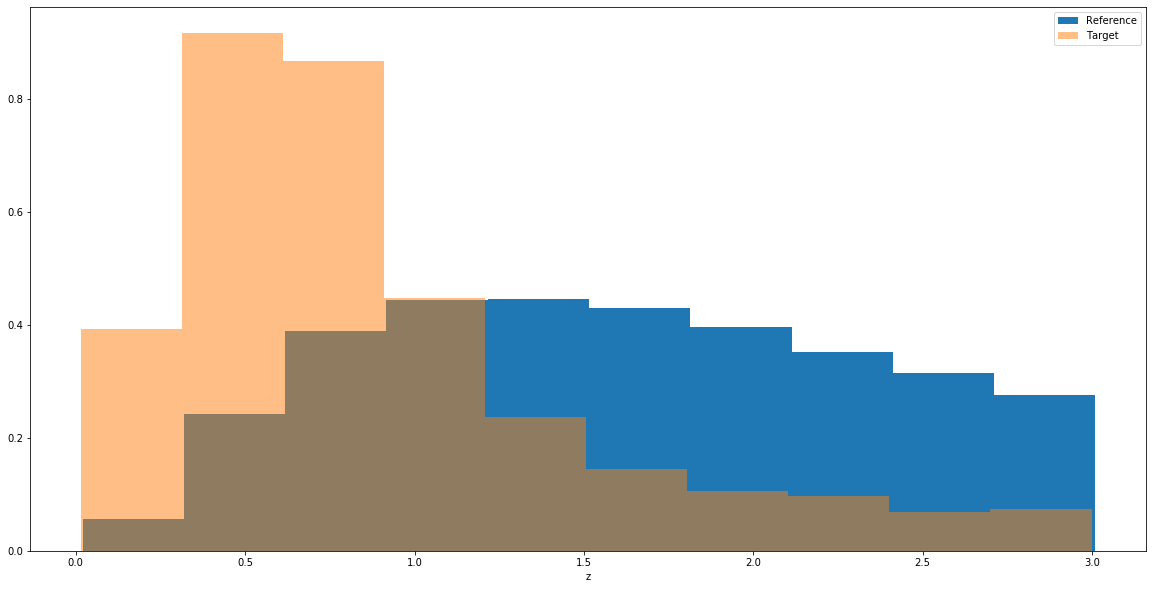

In [64]:
plt.figure(figsize=(20,10))
plt.hist(z, label='Reference', density=True)
plt.hist(t['z'], label='Target', density=True, alpha=0.5)
plt.xlabel('z')
plt.legend()
plt.show()